In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import scipy.fftpack
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Import the data

In [2]:
!wget "https://github.com/fedhere/PUI2017_fb55/raw/master/HW10_fb55/MTA_Fare.npy";

In [3]:
mtaRides = np.load("MTA_Fare.npy")
mtaRides = mtaRides.astype('float')
mtaRides[mtaRides == -1] = 0

In [4]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

dates = pd.date_range('5/21/10', periods=194, freq='W')

In [5]:
mtaRides.shape

(600, 23, 194)

The shape of the array reveals that we are considering 600 stations, 23 types of metrocards, over the span of 194 weeks.

In [6]:
swipes = np.nansum(mtaRides, axis=0)
print (swipes.shape)
stations = np.nansum(mtaRides, axis=1)
print (stations.shape)

(23, 194)
(600, 194)


# Task 1:
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series. Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.

In order to Prepare the data for Task 1, where we are looking for an event that resulted in a significant change, we should flatten the data along the first two axes.

In [7]:
mtaRides1 = mtaRides.reshape(13800, 194)
mtaRides1.shape

(13800, 194)

In [8]:
mtaAllRides = 0

for i in range(13799):
    mtaAllRides += mtaRides1[i]

In [9]:
mean = mtaAllRides.mean()
std = mtaAllRides.std()

In [10]:
mtaAllRides.argmin()

126

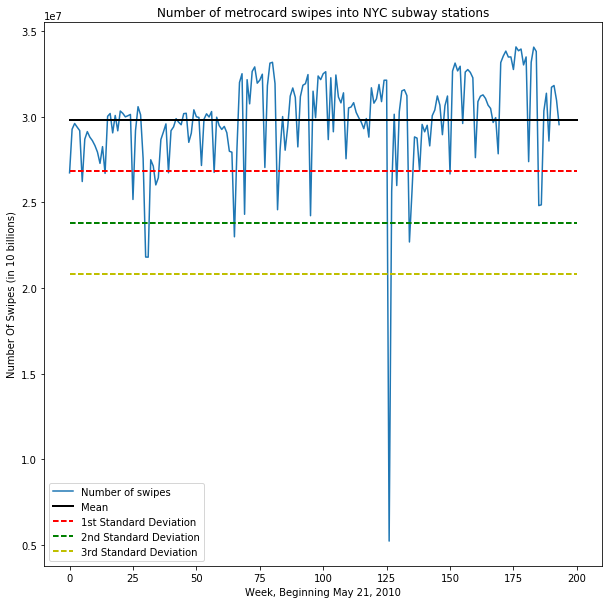

In [11]:
fig = figsize(10,10)
plt.title("Number of metrocard swipes into NYC subway stations")
plt.xlabel("Week, Beginning May 21, 2010")
plt.ylabel("Number Of Swipes (in 10 billions)")
plt.plot(mtaAllRides, label='Number of swipes')
plt.plot([0, 200], [mean, mean], 'k-', lw=2, label='Mean')
plt.plot([0, 200], [mean - std, mean - std], 'r--', lw=2, label="1st Standard Deviation")
plt.plot([0, 200], [mean - 2 * std, mean - 2 * std], 'g--', lw=2, label="2nd Standard Deviation")
plt.plot([0, 200], [mean - 3 * std, mean - 3 * std], 'y--', lw=2, label="3rd Standard Deviation")
plt.legend(loc='lower left');

### Figure 1 shows the aggregate number of metrocard swipes across all 600 stations over the span on 194 weeks, beginning May 21, 2010. From the plot, we can see that a significant event took place during week 127, which coincides with the week of October 28, 2012. This is the week that Hurricane Sandy hit New York City, cutting power to all of downtown Manhattan along with areas of the outer boroughs. Subways were affected by the storm, and were not running, which is represented by the sharp decrease in metrocard swipes for that week in the data.

# Task 2:
Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [12]:
mtaRides = mtaRides.astype('float')
mtaRides[mtaRides == -1] = np.nan
swipes = np.nansum(mtaRides, axis=0)
print (swipes.shape)

(23, 194)


In [13]:
SwipesData = pd.DataFrame(data=swipes)
SwipesData = SwipesData.T
SwipesData.columns = ridetype
SwipesData.head()

,10t,14d,1d,2t,30d,7d,ada,afas,exp,ez,...,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus,stud
0,11494615.0,530524.0,47801.0,186551.0,46808.0,3697443.0,8551937.0,10063.0,333197.0,512032.0,...,123134.0,790110.0,59809.0,28221.0,0.0,124693.0,21060.0,6128.0,358.0,0.0
1,12526859.0,583533.0,51486.0,199229.0,64353.0,3981808.0,9486394.0,11847.0,282755.0,578023.0,...,151948.0,908068.0,69209.0,32333.0,0.0,121713.0,21670.0,6120.0,474.0,0.0
2,12766627.0,586194.0,51636.0,199668.0,56994.0,4033030.0,9476538.0,12277.0,302028.0,615537.0,...,151538.0,914124.0,69574.0,32618.0,0.0,122181.0,21433.0,6490.0,465.0,0.0
3,12653675.0,562602.0,52063.0,196389.0,37429.0,4032753.0,9450081.0,11221.0,305513.0,606270.0,...,147094.0,902549.0,68099.0,32404.0,0.0,122051.0,21630.0,6590.0,484.0,0.0
4,12809694.0,548858.0,51153.0,194883.0,35210.0,3925446.0,9294002.0,10515.0,335780.0,563446.0,...,137888.0,855573.0,66377.0,31933.0,176.0,119776.0,20297.0,6313.0,452.0,0.0


### Let's try plotting all of these on one plot, using the log value to make it more visually revealing...

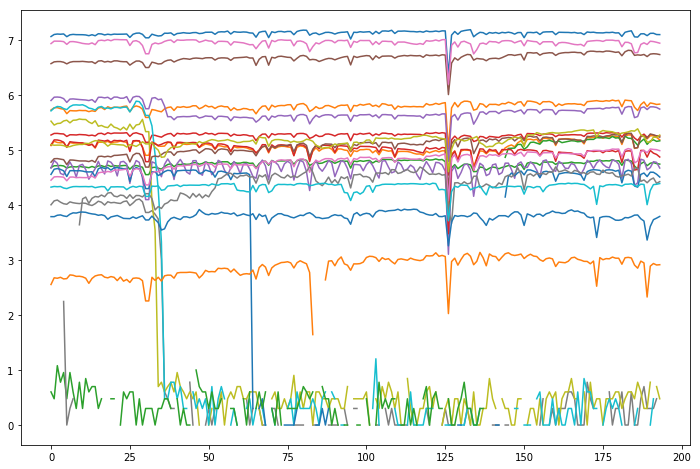

In [14]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

for i in range(22): 
    plt.plot(np.log10(SwipesData[ridetype[i]]), label=ridetype[i]);

### Figure 2 shows the 23 metrocard type usage over the span of 194 weeks. Some of the indexes have zero values for numerous weeks, which will skew our data down the line.... let's try printing each type independently, removing the ones that have zero values, which possibly represent incomplete data

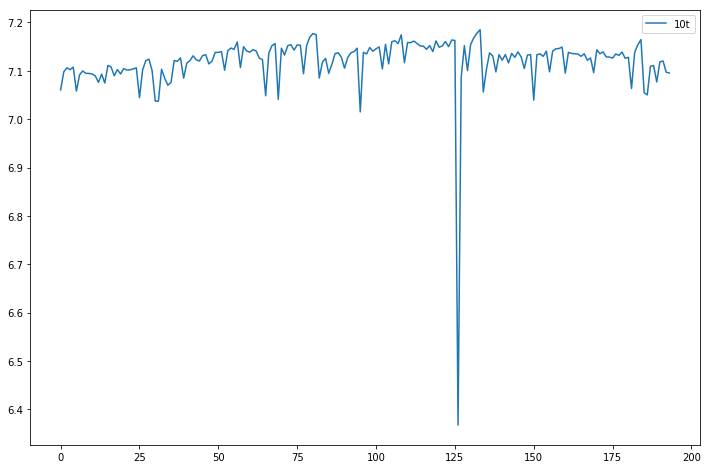

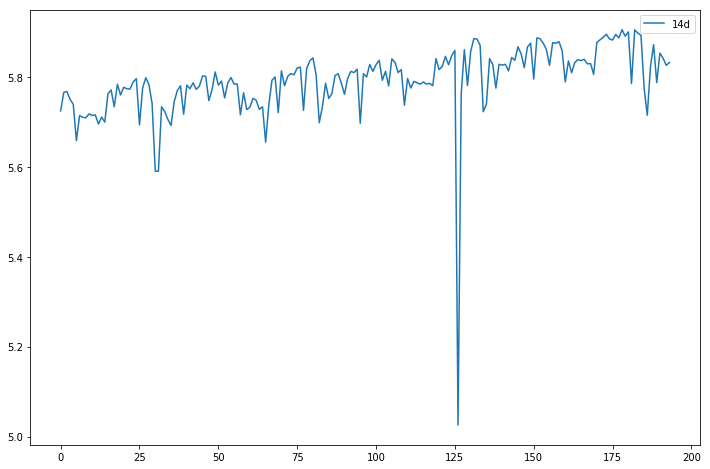

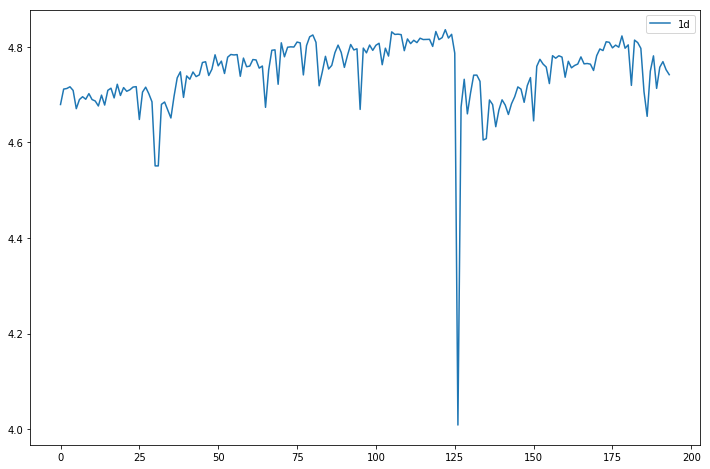

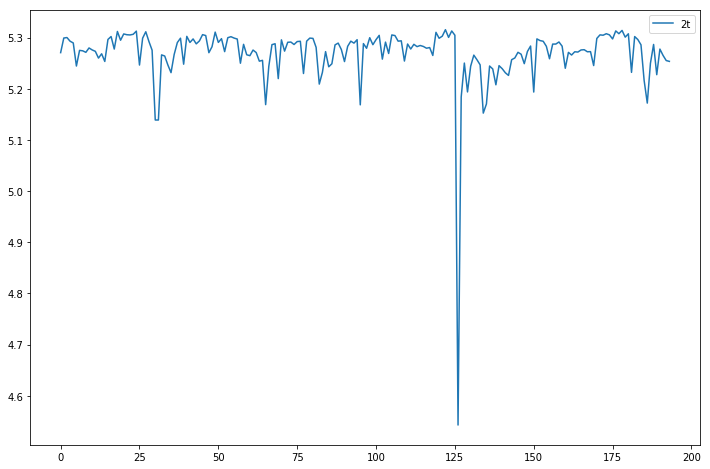

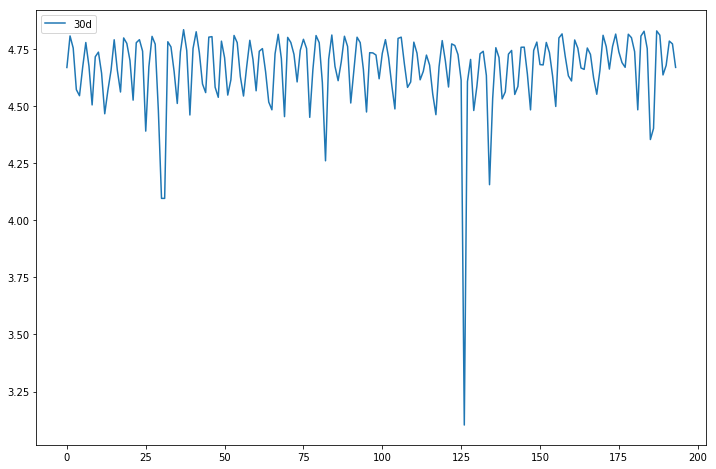

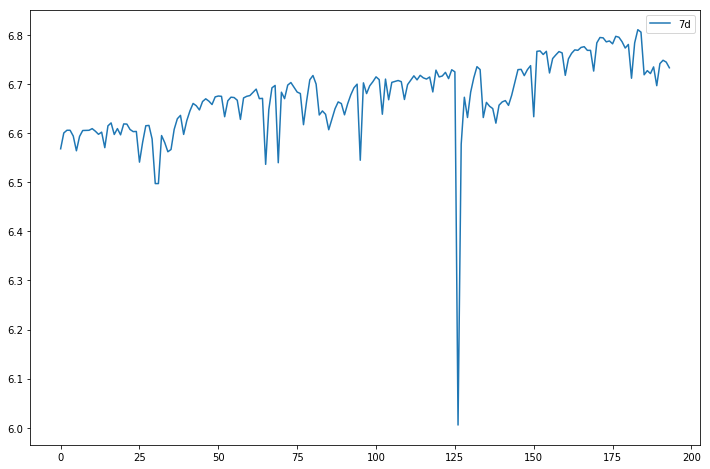

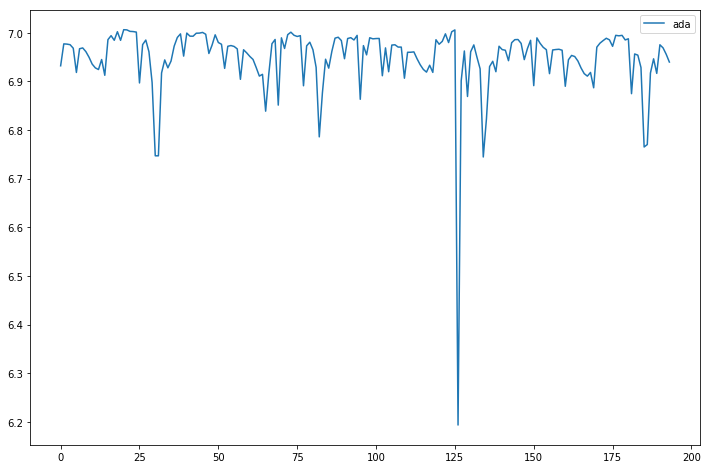

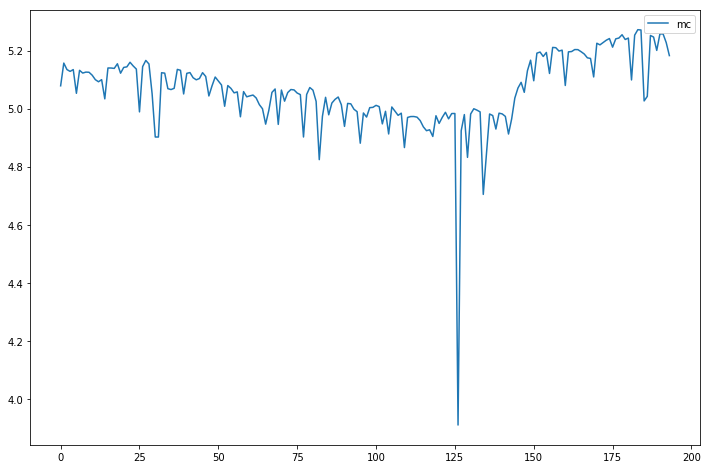

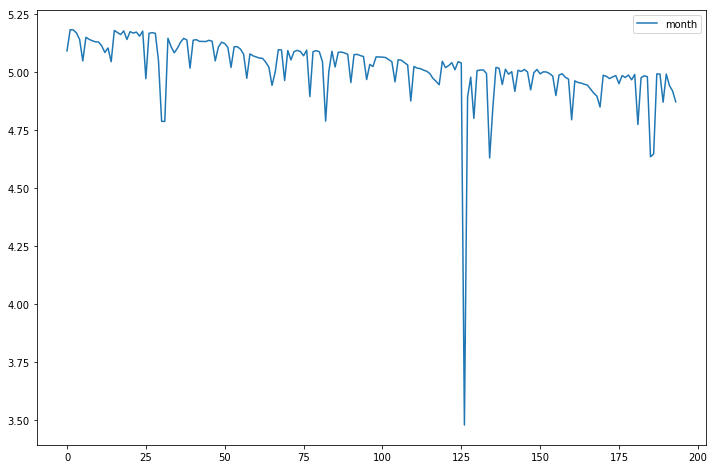

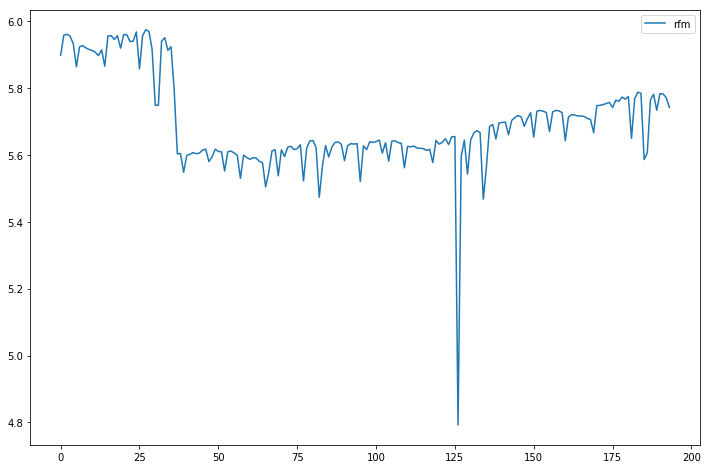

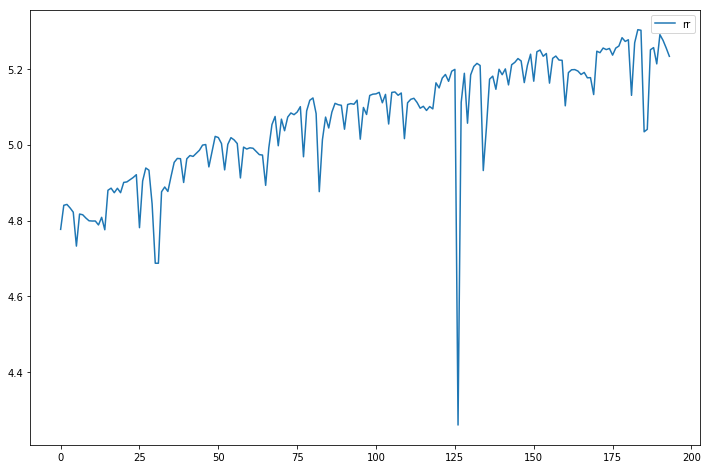

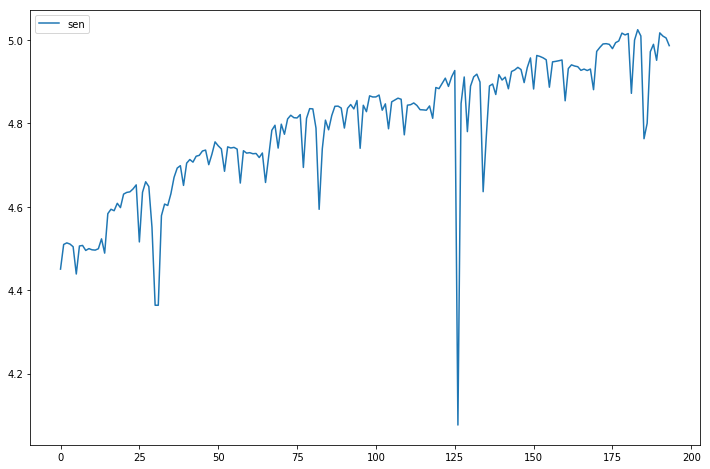

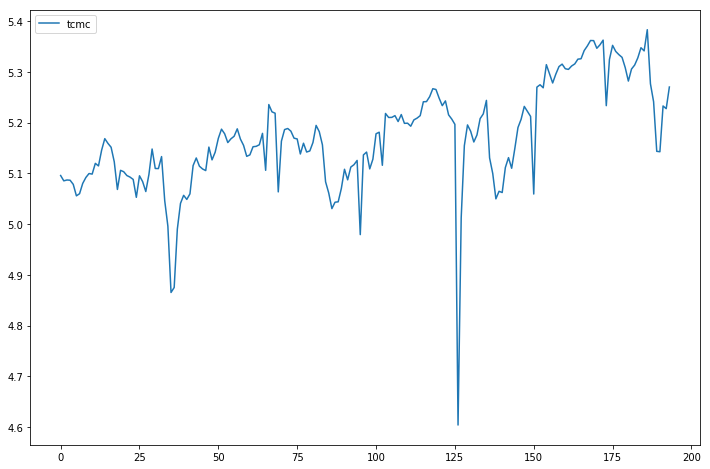

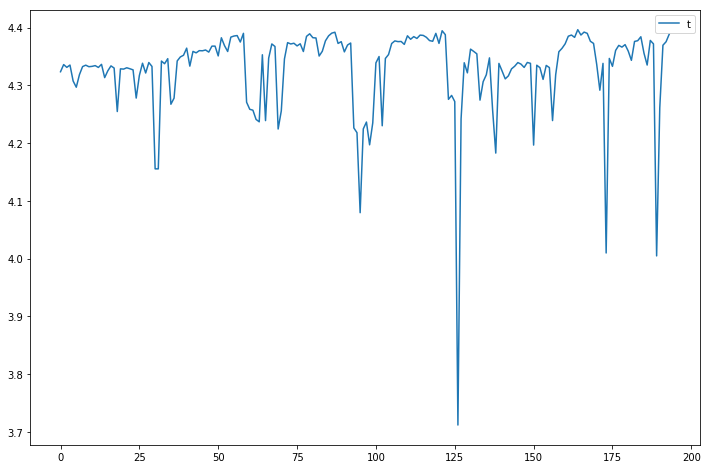

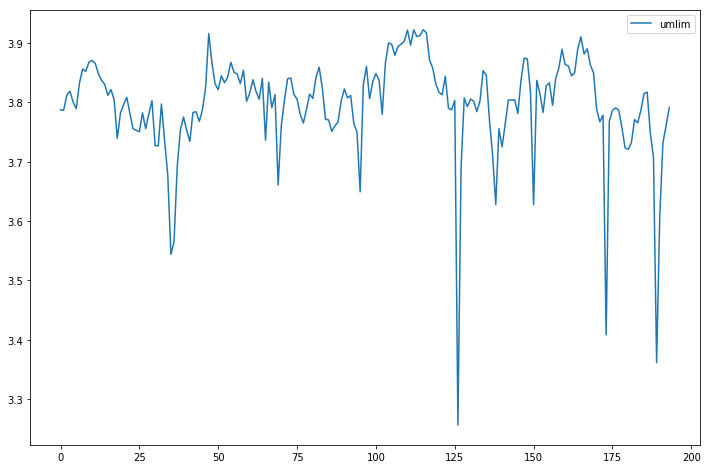

In [15]:
#fig = plt.figure(figsize=(12,8))
#ax = fig.add_subplot(111)

for i in range(22): 
    if (np.min(SwipesData[ridetype[i]]) > 0):
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111)
        plt.plot(np.log10(SwipesData[ridetype[i]]), label=ridetype[i]);
        ax.legend()


### Visually, 14 Day, 7 Day, Rail Road, Senior Citizen, and Transic Check usage all appear to be trending upwards. Monthly usage is the most evident type to be trending downward. Let's calculate the ratios in order to further determine the most upward and downward trending cards.

In [16]:
InitialTrend = SwipesData.ix[:9,:]
InitialTrend = InitialTrend.astype(int)

In [17]:
EndTrend = SwipesData.ix[-10:,:]
EndTrend = EndTrend.astype(int)

In [18]:
Ratio = pd.DataFrame([InitialTrend.mean(), EndTrend.mean()])
Ratio = Ratio.T

In [19]:
Ratio = Ratio.rename(columns={0: 'Initial', 1: 'End'})
Ratio['ratio'] = Ratio['End'] / Ratio['Initial']
Ratio['difference'] = Ratio['End'] - Ratio['Initial']
Ratio.head(23)

,Initial,End,ratio,difference
10t,12347326.1,1.324237e+07,1.072489,895046.869072
14d,533376.2,6.279107e+05,1.177238,94534.531959
1d,49898.9,5.631127e+04,1.128507,6412.373196
2t,190627.5,1.872066e+05,0.982055,-3420.891753
30d,47956.2,4.855778e+04,1.012544,601.578351
7d,3934303.6,4.794654e+06,1.218679,860350.843299
ada,9117571.2,8.958481e+06,0.982551,-159089.834021
afas,10981.3,1.886149e+03,0.171760,-9095.150515
exp,327499.7,4.870894e+04,0.148730,-278790.761856
ez,599218.7,9.940767e+04,0.165895,-499811.029897


In [20]:
for i in range(22): 
    if (np.min(SwipesData[ridetype[i]]) > 0):
        print(ridetype[i])

10t
14d
1d
2t
30d
7d
ada
mc
month
rfm
rr
sen
tcmc
t
umlim


In [21]:
dfRatio = Ratio.T
dfRatio = dfRatio[['10t', '14d','1d','2t','30d','7d','ada','mc','month','rr','sen','tcmc','t', 'umlim']]
dfRatio = dfRatio.T
print(dfRatio['ratio'].min())
print(dfRatio['ratio'].max())

0.785876508517
2.0909262653


### Based on the calculated ratios, the card type that has the greatest increase in usage is the Senior Citizen card, and the card type with the greatest decrease in usage is the Reduced Fare Media. However, looking at the independent visualizations above, the Reduced Fare Media had a drastic drop (most likely due to an event) early into the data collection, after which it began to trend upward again. Excluding this card type from consideration, the card type that has the greatest decrease in usage is the Monthly metro card. 

### In order to qualify for the Senior Citizen card you must be 65 years or older. The Baby Boomer generation, members of which were born between 1946 and 1964, were beginning to turn 65 over the years these data were collected, so it's possible this upward trend is due to that. 

# Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [22]:
stations = np.nansum(mtaRides, axis=1)
print (stations.shape)

(600, 194)


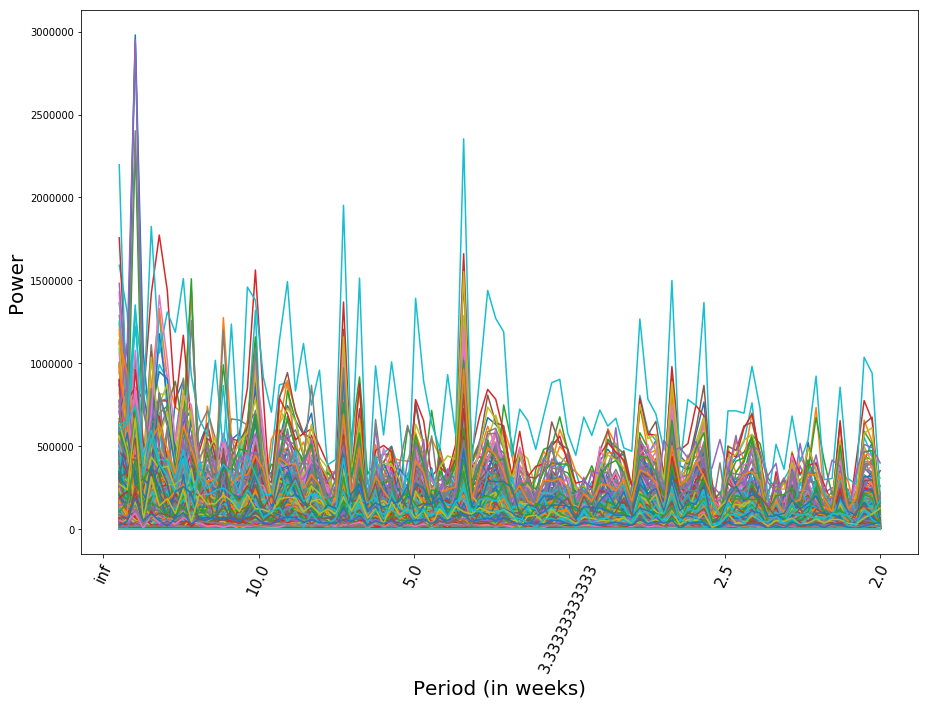

In [23]:
fig = plt.figure(figsize=(15,10))
plt.xlabel("Period (in weeks)", fontsize=20)
plt.ylabel("Power", fontsize=20)
ax = fig.add_subplot(111)
N = 194

x = np.fft.rfftfreq(N, 1.0)

for i in range(len(stations)):
    f = np.abs(np.fft.rfft(stations[i]))
    plt.plot(x[2:], f[2:], '-')

ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], rotation=65, fontsize=15);

### Looking at the above figure, the tallest spike appears to be a collection of 3-4 spectrums that have the highest periodicity. I believe these are the ones worth focusing on. Using 2500000 as a threshold, let's plot the above again for stations that have maximum values above this limit.

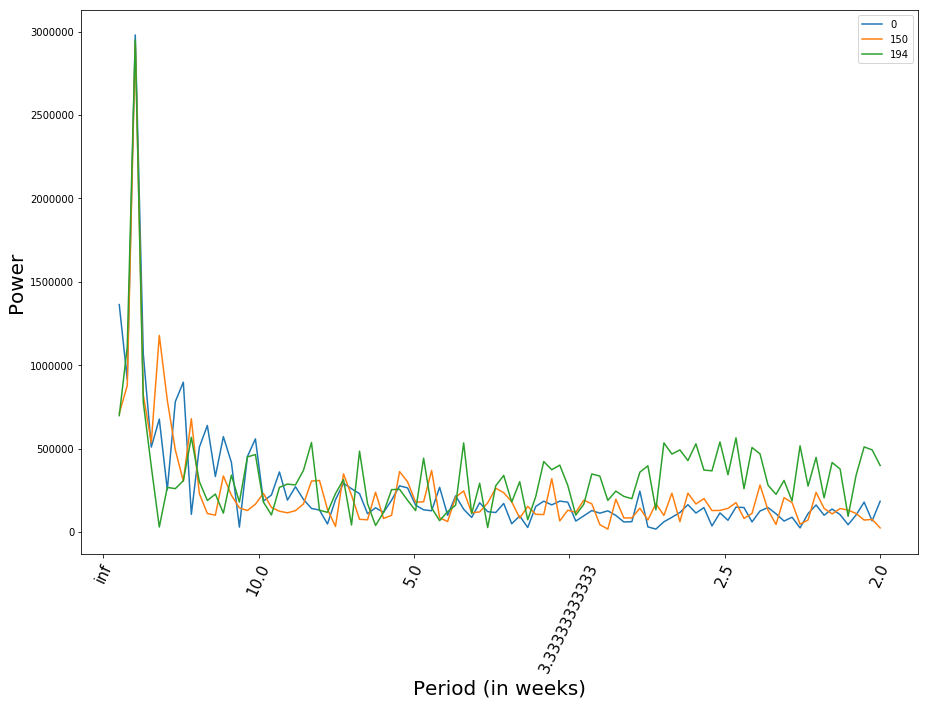

In [24]:
fig = plt.figure(figsize=(15,10))
plt.xlabel("Period (in weeks)", fontsize=20)
plt.ylabel("Power", fontsize=20)
ax = fig.add_subplot(111)
N = 194

x = np.fft.rfftfreq(N, 1.0)

for i in range(len(stations)):
    f = np.abs(np.fft.rfft(stations[i]))
    if f[2:].max() > 2500000:
        plt.plot(x[2:], f[2:], '-', label=i)
        plt.legend()

ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], rotation=65, fontsize=15);

### The above method identified 3 of the 4 stations we want. Let's lower the threshhold bit by bit until we can find our fourth station

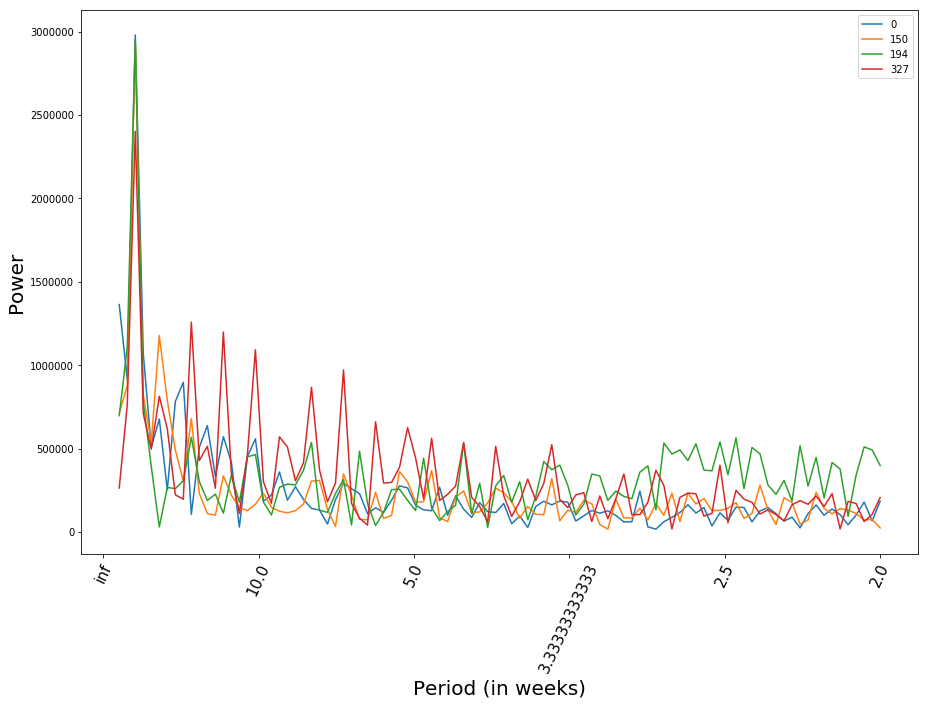

In [25]:
fig = plt.figure(figsize=(15,10))
plt.xlabel("Period (in weeks)", fontsize=20)
plt.ylabel("Power", fontsize=20)
ax = fig.add_subplot(111)
N = 194

x = np.fft.rfftfreq(N, 1.0)

for i in range(len(stations)):
    f = np.abs(np.fft.rfft(stations[i]))
    if f[2:].max() > 2400000:
        plt.plot(x[2:], f[2:], '-', label=i)
        plt.legend()

ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], rotation=65, fontsize=15);

### The above figure identifies stations 0, 150, 194 and 327 as our 4 stations with the highest annual periodicity. Let's plot them below to see if we can visually confirm periodicity. 



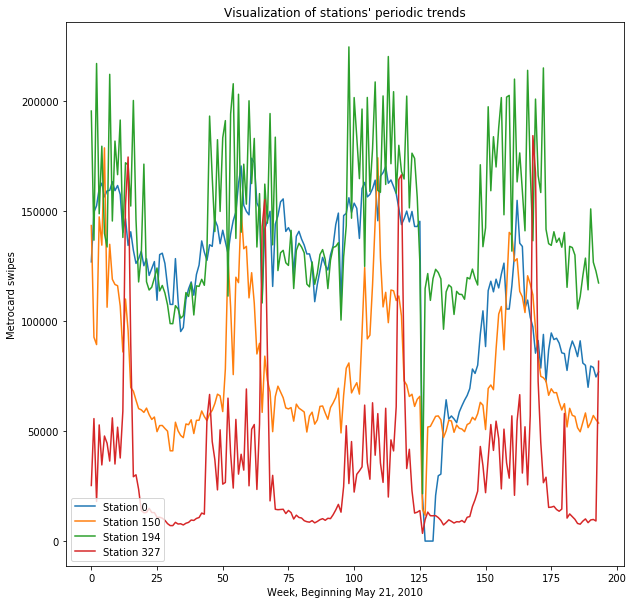

In [26]:
fig = figsize(10,10)
plt.title("Visualization of stations' periodic trends")
plt.xlabel("Week, Beginning May 21, 2010")
plt.ylabel("Metrocard swipes")
plt.plot(stations[0], label='Station 0')
plt.plot(stations[150], label='Station 150')
plt.plot(stations[194], label='Station 194')
plt.plot(stations[327], label='Station 327')
plt.legend(loc='lower left');

### Having visualized the seasonal spikes, let us truncate the plot to look at a single calendar year. Having identified week index 126 as October 28, 2012, simple math tells us that week index 135 is the start of a new calendar year. I will use 135 and 187 as my start and end weeks.

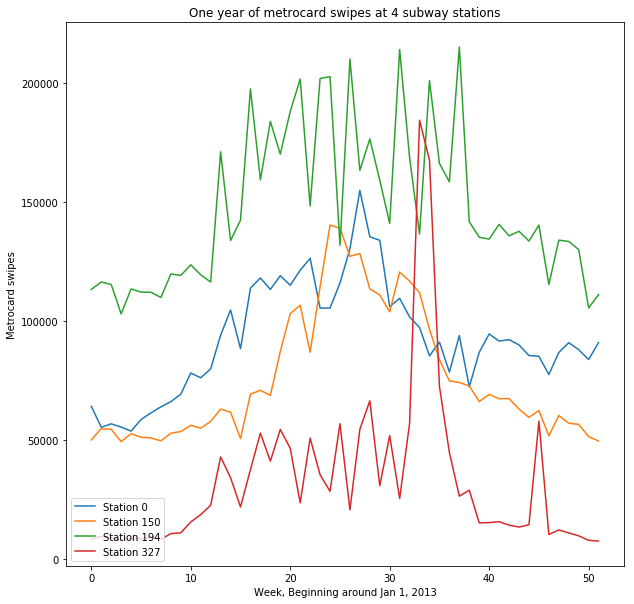

In [27]:
fig = figsize(10,10)
plt.title("One year of metrocard swipes at 4 subway stations")
plt.xlabel("Week, Beginning around Jan 1, 2013")
plt.ylabel("Metrocard swipes")
plt.plot(stations[0,135:187], label='Station 0')
plt.plot(stations[150,135:187], label='Station 150')
plt.plot(stations[194,135:187], label='Station 194')
plt.plot(stations[327,135:187], label='Station 327')
plt.legend(loc='lower left');

### The figure reveals that all of the stations have a seasonal increase during the middle of the calendar year, when the weather is warmer. It's possible that these stations are all located near greenspaces or regions that see increased foot traffic in warmer months. One important spike to mention is the one that occurs in Q3 at station 327. The station has a general periodic increase during the summer, but spikes at the very end of August, first week of September. It's possible that this station is located close to Ground Zero, with the drastic increase due to visitors to the 9/11 memorial.